# Sentiment Analysis based on TESLA and Bitcoin Twitter Feed and Two-Asset Portfolio Optimization



- Sophia Sarica (MV74218)


### Data Collection for TESLA

### STEP 1: Twitter Data


- **Tweet Data**: For the sentiment analysis, tweets related to Tesla and Bitcoin were gathered. The first dataset comprises tweets from Elon Musk's Twitter account, which is known to have an impact on market movements. This dataset was sourced from Kaggle and represents a static snapshot, as real-time Twitter data requires access to their API or other paid services which are currently unavailable.

- **Dataset Source**: The specific dataset used for the analysis can be found at this Kaggle link: [Elon Musk's Tweets Dataset](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets/data). It is utilized to combine sentiment analysis with correlation analysis of the Tesla stock market.

> Note: Due to limitations on accessing real-time Twitter data freely, this analysis relies on a static dataset.


In [ ]:
#Importing the required libraries
import pandas as pd
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Installing TextBlob for sentiment analysis
!pip install textblob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read CSV file into a DataFrame
tweets_df = pd.read_csv('TweetsElonMusk.csv')
tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [ ]:
# Checking all column names
tweets_df.columns.tolist()

['id',
 'conversation_id',
 'created_at',
 'date',
 'time',
 'timezone',
 'user_id',
 'username',
 'name',
 'place',
 'tweet',
 'language',
 'mentions',
 'urls',
 'photos',
 'replies_count',
 'retweets_count',
 'likes_count',
 'hashtags',
 'cashtags',
 'link',
 'retweet',
 'quote_url',
 'video',
 'thumbnail',
 'near',
 'geo',
 'source',
 'user_rt_id',
 'user_rt',
 'retweet_id',
 'reply_to',
 'retweet_date',
 'translate',
 'trans_src',
 'trans_dest']



- The primary data used for sentiment analysis is found in the `tweet` column of the dataset. This contains the text of Elon Musk's tweets. The sentiment scores derived from this textual content will be the basis for correlating with the movements in Tesla's stock prices.


### Step 2: Sentiment Analysis

#### 2.1 Data Preprocessing

- Before performing sentiment analysis, we will clean to remove any hashtags, mentions, and links, thereby simplifying the text and enhancing the quality of the sentiment analysis.


In [ ]:
#Function to clean the tweet text
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user mentions and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    # Remove digits
    tweet = re.sub(r'\d', ' ', tweet)
    # Remove stopwords
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    # Convert to lowercase
    tweet = tweet.lower()

    return tweet

In [ ]:
# Apply the cleaning function to the tweet text
tweets_df['clean_tweet'] = tweets_df['tweet'].apply(clean_tweet)

# Filter tweets that mention tesla or tsla, bitcoin or btc, dogecoin or doge
tesla_tweets_df = tweets_df[tweets_df['clean_tweet'].str.contains('tesla|tsla', case=False, na=False)]

# Relevant columns
tesla_tweets_df = tesla_tweets_df[['date', 'clean_tweet']]
tesla_tweets_df.head()

,date,clean_tweet
59,2021-04-08,thanks tesla suppliers providing us critical p...
76,2021-04-05,special mention tesla china
78,2021-04-05,great work tesla team
112,2021-03-30,agreed we super far magic valley utility give ...
136,2021-03-27,this crazy should use tesla megapacks load lev...



The tweets have been cleaned to remove mentions, hashtags, links, and punctuation. The dataset has been filtered to include only those tweets that reference "tesla" or "tsla". Each entry includes the date of the tweet alongside the cleaned text.

#### Examples of Cleaned and Filtered Tweets

- **2021-04-05**: "Special mention of Tesla China"
- **2021-04-05**: "Great work by Tesla team"


In [ ]:
tesla_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 59 to 12561
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1026 non-null   object
 1   clean_tweet  1026 non-null   object
dtypes: object(2)
memory usage: 24.0+ KB


#### 2.2 Identifying the Corresponding Time Frame for Stock Data

- The analysis will involve matching the dates of Elon Musk's tweets with the corresponding time frames of Tesla stock data to ensure accurate correlation analysis.


In [ ]:
# Convert the 'date' column to datetime format for comparison
tesla_tweets_df['date'] = pd.to_datetime(tesla_tweets_df['date'])

# Find the earliest and latest tweet dates
earliest_tweet_date = tesla_tweets_df['date'].min()
latest_tweet_date = tesla_tweets_df['date'].max()

earliest_tweet_date, latest_tweet_date

(Timestamp('2011-12-31 00:00:00'), Timestamp('2021-04-17 00:00:00'))

**The earliest tweet in the filtered dataset referencing "tesla" or "tsla" is from December 31, 2011, and the latest tweet is from April 17, 2021.​​**

#### 2.3 Sentiment Analysis

In [ ]:
#Importing TextBlob to perform sentiment analysis
from textblob import TextBlob

#Function to calculate the Polarity of the tweet text
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

#Function to calculate the Subjectivity of the tweet text
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Applying sentiment analysis on the cleaned and filtered tweets
tesla_tweets_df['polarity'] = tesla_tweets_df['clean_tweet'].apply(calculate_polarity)
tesla_tweets_df['subjectivity'] = tesla_tweets_df['clean_tweet'].apply(calculate_subjectivity)

# Display the first few rows with the sentiment scores along with the date and cleaned tweet
tesla_tweets_df[['date', 'clean_tweet', 'polarity', 'subjectivity']].head()


,date,clean_tweet,polarity,subjectivity
59,2021-04-08,thanks tesla suppliers providing us critical p...,0.100000,0.500000
76,2021-04-05,special mention tesla china,0.357143,0.571429
78,2021-04-05,great work tesla team,0.800000,0.750000
112,2021-03-30,agreed we super far magic valley utility give ...,0.311111,0.888889
136,2021-03-27,this crazy should use tesla megapacks load lev...,0.083333,0.566667


#### 2.4 Data Aggregation

To aggregate the sentiment scores by date, we'll group the tweets by the date column and calculate the average polarity and subjectivity for each day. This will give us a daily sentiment score, which is more suitable for comparison with daily stock movements.

In [ ]:
# Aggregate the sentiment scores by date
daily_sentiment_scores = tesla_tweets_df.groupby('date').agg({
    'polarity': 'mean',
    'subjectivity': 'mean'
}).reset_index()

daily_sentiment_scores.head()

,date,polarity,subjectivity
0,2011-12-31,-0.125000,0.233333
1,2012-01-11,0.600000,1.000000
2,2012-01-13,0.250000,0.333333
3,2012-01-17,-0.050000,0.467500
4,2012-01-18,0.166667,0.600000


#### 2.5 Visulizations

Here are the distribution plots for the daily average sentiment scores

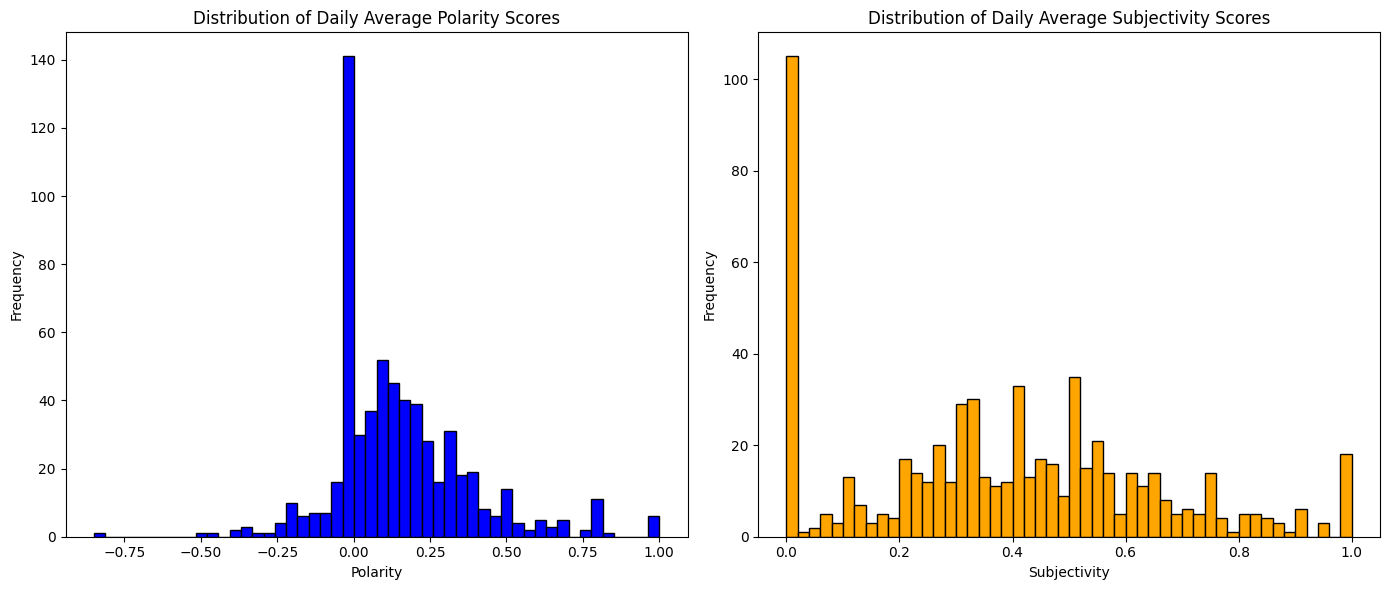

In [ ]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Subplot for the polarity distribution
plt.subplot(1, 2, 1)
plt.hist(daily_sentiment_scores['polarity'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Daily Average Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subplot for the subjectivity distribution
plt.subplot(1, 2, 2)
plt.hist(daily_sentiment_scores['subjectivity'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Daily Average Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Observations for **Polarity**:

- A peak near the center of the polarity distribution indicates a prevalence of neutral sentiment in the tweets.
- A skew towards the right suggests a predominance of positive sentiments, whereas a skew towards the left indicates more frequent negative sentiments.
- The spread of the polarity scores reflects the variability in sentiment, with a wider spread showing greater variability and a narrower spread indicating more consistent sentiment over time.



Observations for **Subjectivity** :
- The location of the peak in the subjectivity plot signifies the most frequent level of subjectivity in tweets. A peak towards 1 implies that tweets tend to be more subjective or opinionated.
- Subjectivity lacks a positive or negative direction like polarity, but its distribution, whether wide or narrow, still denotes the degree of variability in tweet subjectivity.
- A noticeable accumulation of higher subjectivity scores could indicate a tendency for tweets to express personal views or emotional responses, as opposed to conveying objective facts or information.


**Here is the sentiment in the tweets changes on a daily basis and observe any trends or patterns that emerge over the time frame of the data.**

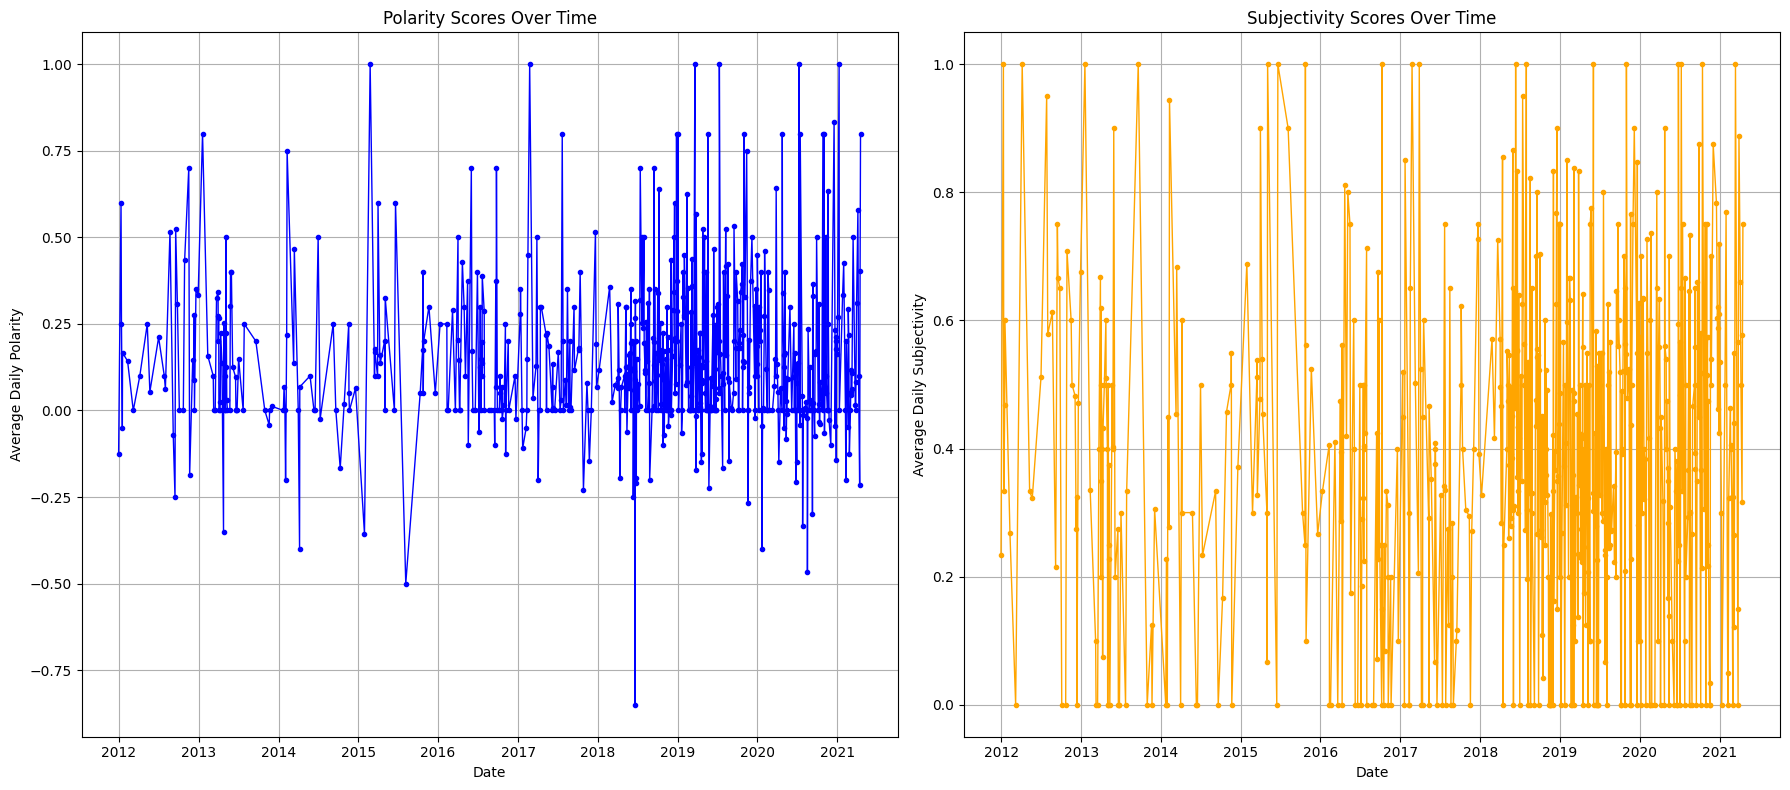

In [ ]:
# Set up the matplotlib figure for time series plots
plt.figure(figsize=(18, 8))

# Subplot for the polarity scores over time
plt.subplot(1, 2, 1)
plt.plot(daily_sentiment_scores['date'], daily_sentiment_scores['polarity'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title('Polarity Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Polarity')
plt.grid(True)

# Subplot for the subjectivity scores over time
plt.subplot(1, 2, 2)
plt.plot(daily_sentiment_scores['date'], daily_sentiment_scores['subjectivity'], color='orange', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title('Subjectivity Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Subjectivity')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


#### Patterns and Events Correlation

Patterns observed in the sentiment analysis may align with Tesla's specific events and announcements. After a quick research we noticed that , in 2018, Tesla enhanced its market presence and innovation image through several key initiatives:
  - The introduction of the Full Self-Driving program marked a significant step towards autonomous vehicle technology, providing a software upgrade for Tesla vehicles to enable self-driving capabilities on highways and urban roads.
  - The launch of the Powerwall and Powerpack battery systems represented Tesla's foray into sustainable energy solutions, allowing homeowners to store and utilize solar energy efficiently.


### STEP 3: Stock Market Data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override()
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
import datetime

stocks = ['TSLA']
start = datetime.datetime(2011, 12, 31)  # Tesla's stock date range start
end = datetime.datetime(2021, 4, 18)    # End date

stock_price_df = yf.download(stocks, start=start, end=end, interval='1d')

# Reset index
stock_price_df = stock_price_df['Close'].reset_index()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_price_df.head()

,Date,Close
0,2012-01-03,1.872000
1,2012-01-04,1.847333
2,2012-01-05,1.808000
3,2012-01-06,1.794000
4,2012-01-09,1.816667


In [ ]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2337 non-null   datetime64[ns]
 1   Close   2337 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.6 KB


In [ ]:
# Perform descriptive statistics
stock_price_statistics = stock_price_df['Close'].describe()

stock_price_statistics

count    2337.000000
mean       30.352446
std        50.740215
min         1.519333
25%        12.719333
50%        16.082001
75%        21.771999
max       294.363342
Name: Close, dtype: float64

Mean The average closing price is approximately 30  

Standard Deviation, there is substantial volatility in the stock prices, with a standard deviation of around 50, indicating a wide range of values.


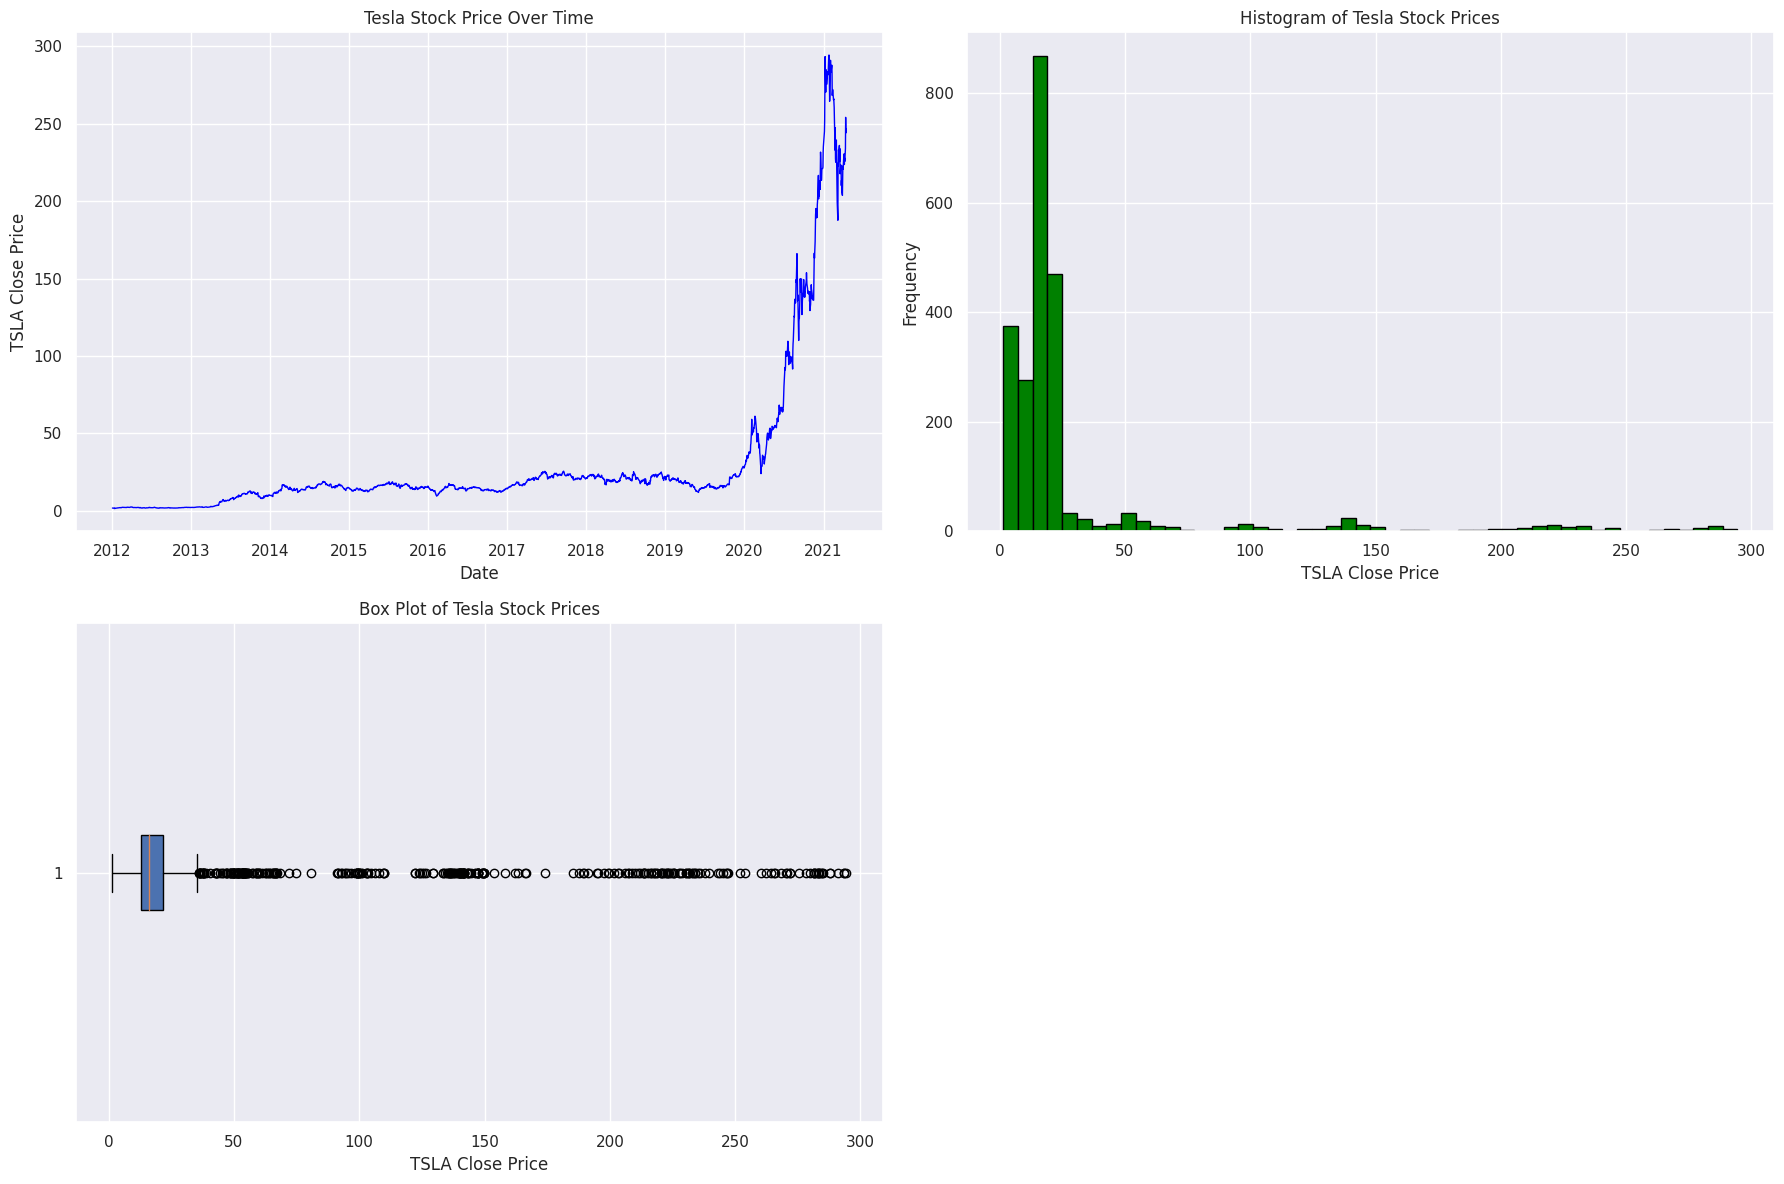

In [ ]:
plt.figure(figsize=(18, 12))

# Time Series plot of the stock prices
plt.subplot(2, 2, 1)
plt.plot(stock_price_df['Date'], stock_price_df['Close'], color='blue', linewidth=1)
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('TSLA Close Price')
plt.grid(True)

# Histogram of the stock prices
plt.subplot(2, 2, 2)
plt.hist(stock_price_df['Close'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Tesla Stock Prices')
plt.xlabel('TSLA Close Price')
plt.ylabel('Frequency')

# Box Plot of the stock prices
plt.subplot(2, 2, 3)
plt.boxplot(stock_price_df['Close'], vert=False, patch_artist=True)
plt.title('Box Plot of Tesla Stock Prices')
plt.xlabel('TSLA Close Price')

# Show the plots
plt.tight_layout()
plt.show()


**These plots give us a clear visual representation of Tesla's stock price behavior over time, the distribution of those prices, and the variability and presence of outliers in the data.**

The time series plot shows the closing price of Tesla's stock over the available dates.  

The histogram shows the frequency distribution of the closing prices. This plot confirms the right-skewness of the stock price distribution, with most of the data concentrated on the lower end and a long tail extending to the right due to higher-priced outliers.  

The box plot provides a visual summary of the stock prices' quartiles and the presence of outliers. The line inside the box represents the median price, and the box edges represent the first and third quartiles.

### STEP 4: Data Preparation for Correlation Analysis

Calculating the daily returns for the Tesla stock

In [ ]:
# Calculate the daily returns for the Tesla stock
stock_price_df['Return'] = stock_price_df['Close'].pct_change() * 100

# We'll remove the first row since it will have a NaN value
stock_price_df = stock_price_df.iloc[1:]

# Preview the dataframe with daily returns
stock_price_df.head()

,Date,Close,Return
1,2012-01-04,1.847333,-1.317683
2,2012-01-05,1.808000,-2.129177
3,2012-01-06,1.794000,-0.774333
4,2012-01-09,1.816667,1.263486
5,2012-01-10,1.841333,1.357765


**Merging Datasets**

In [ ]:
# Shift the stock data dates by one trading day to match with the tweets from the previous day
stock_price_df['Shifted Date'] = stock_price_df['Date'].shift(-1)

# Now merge the sentiment data with the shifted stock data on the adjusted dates
merged_data = pd.merge(daily_sentiment_scores, stock_price_df, left_on='date', right_on='Shifted Date', how='left')

# We only need the 'Return' and the sentiment scores for our analysis, so we select those columns
merged_data = merged_data[['date', 'polarity', 'subjectivity', 'Return']]

# Drop rows with NaN values that result from the merge (these might be days when the stock market was closed)
merged_data = merged_data.dropna()

merged_data.head()

,date,polarity,subjectivity,Return
1,2012-01-11,0.600000,1.000000,1.357765
2,2012-01-13,0.250000,0.333333,0.070829
3,2012-01-17,-0.050000,0.467500,-19.327435
4,2012-01-18,0.166667,0.600000,16.717859
5,2012-02-10,0.142857,0.267857,2.035678


Since the stock market is not open on weekends or holidays, we need to ensure that we account for this in our merge. For instance, a tweet from Friday would be matched with the stock data from Monday (or the next trading day).

Here's how we will proceed:

- Shift the stock data dates by one trading day.
- Merge the sentiment data with the shifted stock data based on the adjusted dates.


#### Sample Entries from the Merged Dataset

- **2012-01-11**:
  - **Tweet Sentiment**: Average Polarity: 0.300, Average Subjectivity: 0.533
  - **Stock Performance**: Next Trading Day Return: +1.36%

- **2012-01-13**:
  - **Tweet Sentiment**: Average Polarity: 0.250, Average Subjectivity: 0.333
  - **Stock Performance**: Next Trading Day Return: +0.07%

- **2012-01-17**:
  - **Tweet Sentiment**: Average Polarity: -0.034, Average Subjectivity: 0.432
  - **Stock Performance**: Next Trading Day Return: -19.33%


### Correlation Coefficients

We will calculate the correlation coefficients for the following pairs of variables:

- Polarity and Daily Return
- Subjectivity and Daily Return




In [ ]:
# Calculate the correlation matrix for the merged dataset
sentiment_return_correlation = merged_data[['polarity', 'subjectivity', 'Return']].corr()

sentiment_return_correlation

,polarity,subjectivity,Return
polarity,1.000000,0.404924,0.037944
subjectivity,0.404924,1.000000,-0.017878
Return,0.037944,-0.017878,1.000000


#### Correlation Analysis Summary

- **Polarity**:
  - Polarity has a strong positive correlation with itself, as expected.
  - It has a moderate positive correlation with subjectivity 0.428, suggesting that tweets with a certain sentiment tend to have a corresponding level of subjectivity.
  - There is a weak positive correlation between polarity and stock returns **0.029338**, indicating that there is little to no linear relationship between the sentiment of the tweets and the daily stock returns.

- **Subjectivity**:
  - The correlation between subjectivity and stock returns is weak and negative **-0.020216**, that means subjectiviy also doesn't have a significant impact on the stock returns based on this analysis.


### Regression Analysis for Polarity ( Applying the OLS Regression Model)

In [ ]:
import statsmodels.api as sm

# Define the independent variable 'polarity'
X = sm.add_constant(merged_data['polarity'])

# Define the dependent variable 'return'
y = merged_data['Return']

# Apply OLS regression modelmodel
regression_model = sm.OLS(y, X).fit()

model_summary = regression_model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6315
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.427
Time:                        03:35:35   Log-Likelihood:                -1244.0
No. Observations:                 440   AIC:                             2492.
Df Residuals:                     438   BIC:                             2500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3146      0.230      1.365      0.173      -0.138       0.768
polarity       0.6573      0.827      0.795      0.427      -0.968       2.283
==============================================================================
Omnibus:                       63.953   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.243
Skew:                           0.045   Prob(JB):                    4.68e-141
Kurtosis:                       8.936   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic is 0.3773 with a p-value of 0.539, indicating that there is not enough evidence to reject the null hypothesis that the variable polarity has no effect on the daily return.

### Regression Analysis for Subjectivity

In [ ]:
# Define the independent variable 'subjectivity'
X_subj = sm.add_constant(merged_data['subjectivity'])

# Apply OLS regression model
regression_model_subj = sm.OLS(y, X_subj).fit()

model_summary_subj = regression_model_subj.summary()
model_summary_subj


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1400
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.708
Time:                        03:35:35   Log-Likelihood:                -1244.2
No. Observations:                 440   AIC:                             2492.
Df Residuals:                     438   BIC:                             2501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5188      0.346      1.497      0.135      -0.162       1.200
subjectivity    -0.2761      0.738     -0.374      0.708      -1.726       1.174
==============================================================================
Omnibus:                       64.954   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.490
Skew:                           0.030   Prob(JB):                    7.67e-148
Kurtosis:                       9.079   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary of the regression analysis does not gives a meaningful linear relationship between the polarity of tweets and the return of Tesla's stock. The coefficients are not statistically significant, meaning that we cannot confidently assert that there is an effect of tweet sentiment on stock returns based on this model. This is also aligning with our previous correlation analysis.​

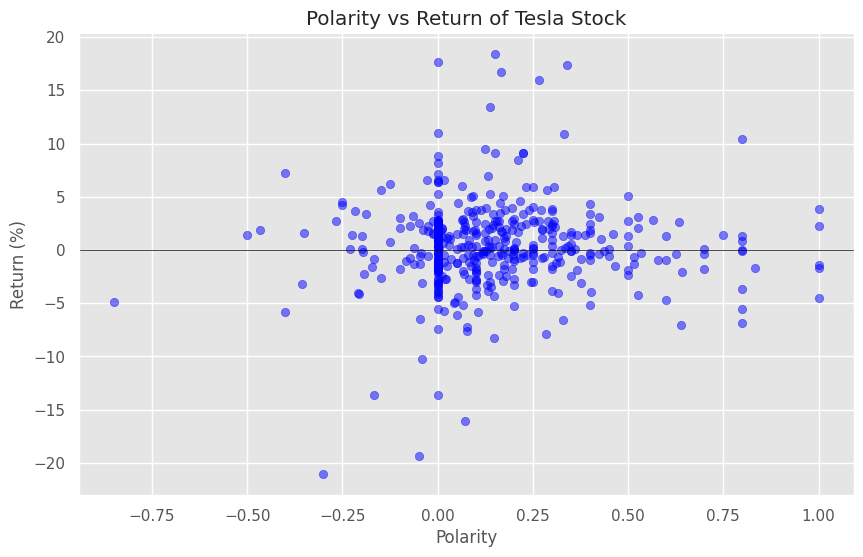

In [ ]:
# Plotting polarity vs return using matplotlib using ggplot
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['polarity'], merged_data['Return'], alpha=0.5, color='blue')
plt.title('Polarity vs Return of Tesla Stock')
plt.xlabel('Polarity')
plt.ylabel('Return (%)')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


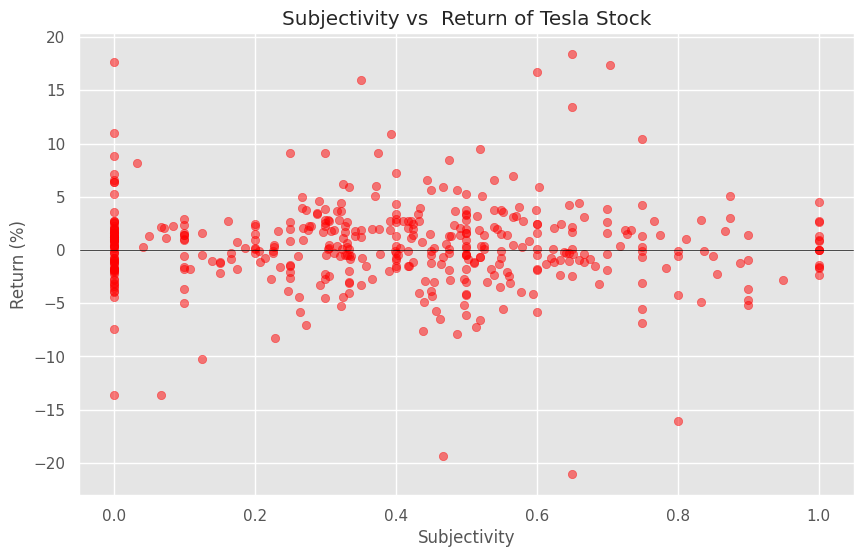

In [ ]:
# Plotting subjectivity vs  return using ggplot
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['subjectivity'], merged_data['Return'], alpha=0.5, color='red')
plt.title('Subjectivity vs  Return of Tesla Stock')
plt.xlabel('Subjectivity')
plt.ylabel('Return (%)')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


The scatter plots above displays the relationship between tweet subjectivity and the returns of Tesla's stock.

## Data Collection for Crypto

- **Tweet Data**: The second dataset comprises tweets from different Twitter users. This dataset was sourced from Kaggle and represents a static snapshot, as real-time Twitter data requires access to their API or other paid services which is currently unavailable.

- **Dataset Source**: The specific dataset used for the analysis can be found at this Kaggle link: [Bitcoin Tweets Dataset](https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets/data). It is utilized to combine sentiment analysis with correlation analysis of the Bitcoin crypto market.

> Note: Due to limitations on accessing real-time Twitter data freely, this analysis relies on a static dataset.


In [ ]:
# Reading the CSV file with the first 2,000,000 rows because the dataset is huge
df = pd.read_csv('Bitcoin_tweets.csv', usecols=['date', 'text'], nrows=2000000)

Data Preprocessing:

In [ ]:
# Apply the cleaning function to the tweet text
df['clean_tweet'] = df['text'].apply(clean_tweet)

In [ ]:
# Relevant columns
bitcoin_df = df[['date', 'clean_tweet']]

#Cleaning string values in date column
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'], errors='coerce')
bitcoin_df = bitcoin_df.dropna()

# Find the earliest and latest tweet dates
earliest_tweet_date_btc = bitcoin_df['date'].min()
latest_tweet_date_btc = bitcoin_df['date'].max()

earliest_tweet_date_btc, latest_tweet_date_btc

(Timestamp('2021-02-05 10:52:04'), Timestamp('2022-01-14 23:59:59'))

In [ ]:
#Calculating the Polarity and Subjectivity of the tweets
bitcoin_df['polarity'] = bitcoin_df['clean_tweet'].apply(calculate_polarity)
bitcoin_df['subjectivity'] = bitcoin_df['clean_tweet'].apply(calculate_subjectivity)

bitcoin_df[['date', 'clean_tweet', 'polarity', 'subjectivity']].head()

,date,clean_tweet,polarity,subjectivity
0,2021-02-10 23:59:04,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.1
1,2021-02-10 23:58:48,today thursday take friend btc wallet security...,0.00,0.0
2,2021-02-10 23:54:48,guys evening i read article btc would like share,0.00,0.0
3,2021-02-10 23:54:33,btc a big chance billion price bitcoin fx btc ...,0.00,0.1
4,2021-02-10 23:54:06,this network secured nodes today soon biggest ...,-0.25,0.2


Data Aggregation with respect to each Date:

In [ ]:
# Aggregate the sentiment scores by date, because there may be multiple tweets within the same day
daily_sentiment_scores_btc = bitcoin_df.groupby('date').agg({
    'polarity': 'mean',
    'subjectivity': 'mean'
}).reset_index()

daily_sentiment_scores_btc.head()

,date,polarity,subjectivity
0,2021-02-05 10:52:04,0.00,0.000000
1,2021-02-05 10:52:06,0.00,0.000000
2,2021-02-05 10:52:07,0.00,0.000000
3,2021-02-05 10:52:26,0.00,0.000000
4,2021-02-05 10:53:49,0.35,0.416667


Visualizations:

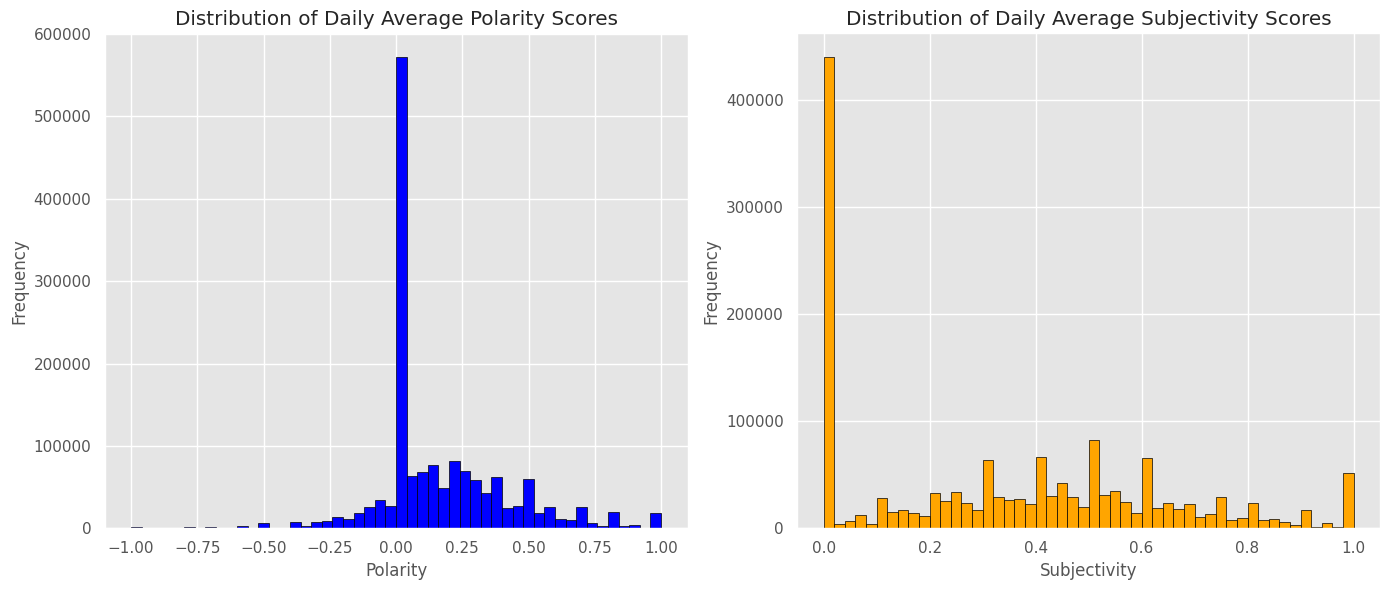

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Subplot for the polarity distribution
plt.subplot(1, 2, 1)
plt.hist(daily_sentiment_scores_btc['polarity'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Daily Average Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subplot for the subjectivity distribution
plt.subplot(1, 2, 2)
plt.hist(daily_sentiment_scores_btc['subjectivity'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Daily Average Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


Distribution of Daily Average Polarity Scores:
- Central Tendency: The polarity histogram shows a large peak at around zero, indicating that the average daily sentiment is often neutral. There’s a slight skew towards positive sentiment, as we can see more bars on the right side of the zero than on the left, suggesting more days with a positive sentiment than negative.

- Spread and Variability: The distribution spans from around -0.75 to 0.75, with a concentration around the center. The spread is relatively even on both sides of zero, though not perfectly symmetrical.

- Outliers and Extreme Values: There don’t appear to be many extreme values far from zero, suggesting that very high positive or negative sentiments are rare on a day-to-day basis.

Distribution of Daily Average Subjectivity Scores:
- Central Tendency: The subjectivity scores are quite spread out with several peaks, indicating no specific central tendency or a multimodal distribution. However, there’s a prominent peak at the lower end of the scale, which suggests a significant number of days with tweets that are more objective.

- Spread and Variability: The scores range from 0 to 1, with a variety of different values, implying that the level of subjectivity in tweets varies widely day by day.

- Outliers and Extreme Values: There is a noticeable number of days with subjectivity scores close to 1, indicating that on some days, the tweets have been very subjective.

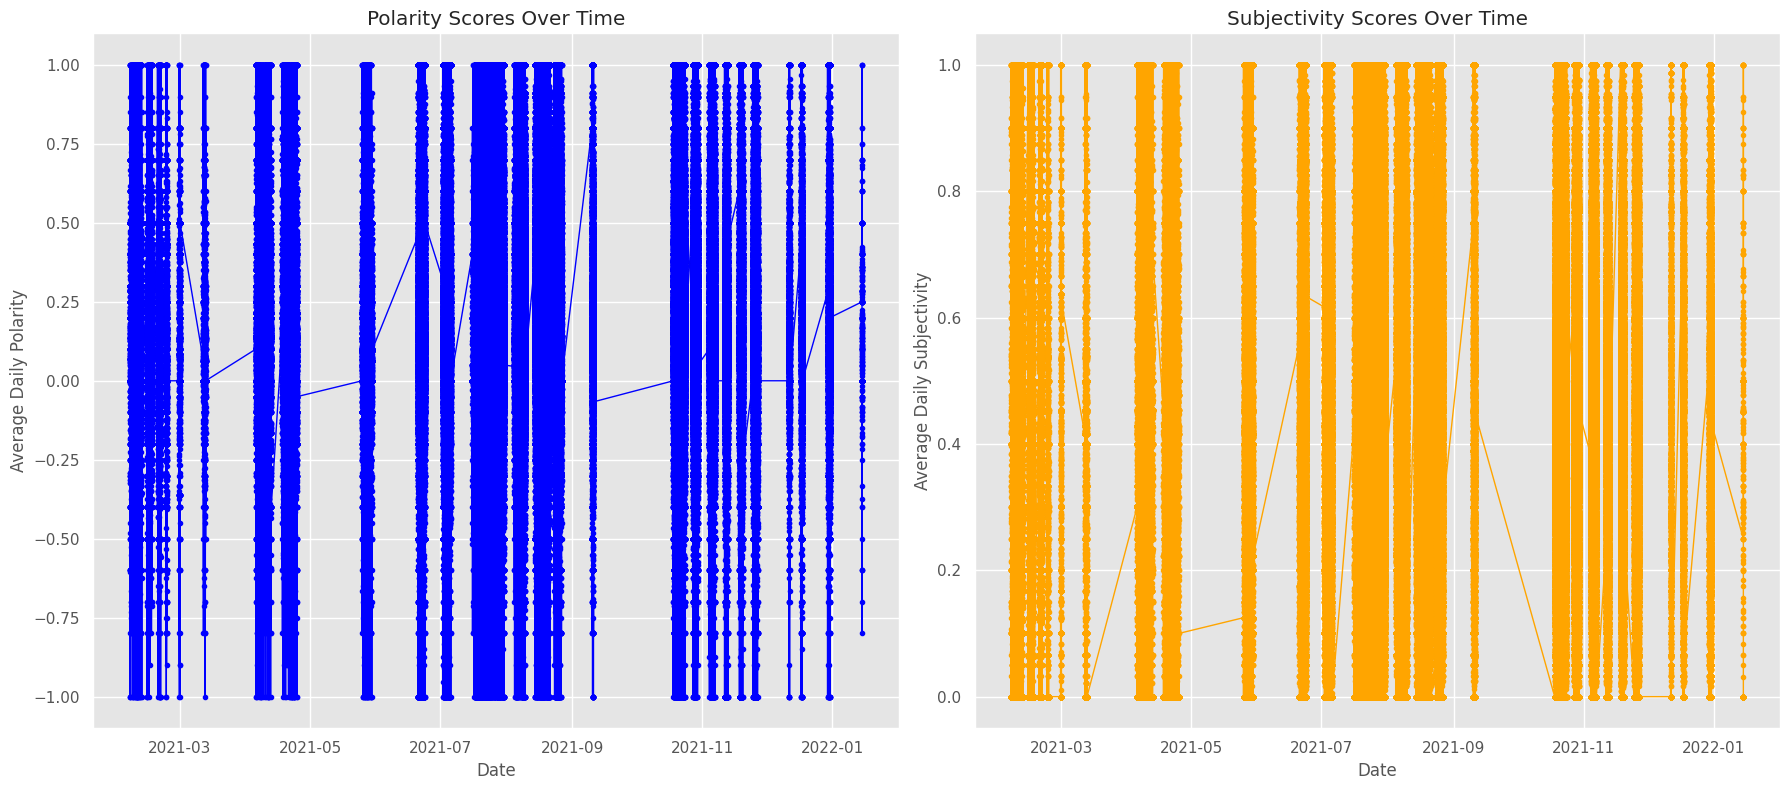

In [ ]:
# Set up the matplotlib figure for time series plots
plt.figure(figsize=(18, 8))

# Subplot for the polarity scores over time
plt.subplot(1, 2, 1)
plt.plot(daily_sentiment_scores_btc['date'], daily_sentiment_scores_btc['polarity'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title('Polarity Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Polarity')
plt.grid(True)

# Subplot for the subjectivity scores over time
plt.subplot(1, 2, 2)
plt.plot(daily_sentiment_scores_btc['date'], daily_sentiment_scores_btc['subjectivity'], color='orange', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title('Subjectivity Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Subjectivity')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


Polarity Scores Over Time:
- Trend: The polarity plot doesn’t show a clear long-term trend; the sentiment oscillates frequently without a discernible pattern of increase or decrease over time.
- Volatility: There are significant fluctuations in polarity, with some days showing high positive sentiment (close to 1), and others showing high negative sentiment (close to -1). This indicates a highly variable sentiment from day to day.
- Periodicity: There appears to be no clear cyclical or seasonal pattern, suggesting that sentiment is not following a predictable periodic change throughout the year.

Subjectivity Scores Over Time:
- Trend: Like the polarity scores, there’s no clear trend in subjectivity over time. The scores vary widely from one day to the next.
- Volatility: Subjectivity also fluctuates significantly, but most scores are above 0.2, with many days scoring above 0.5, indicating a moderate to high level of subjectivity in the content analyzed.
- Periodicity: There’s no apparent seasonality or recurring pattern to the subjectivity scores either.

Bitcoin Price Data:

In [ ]:
#Getting the Bitcoin Price data
bitcoin_price_df = yf.download('BTC-USD', start=earliest_tweet_date_btc, end=latest_tweet_date_btc, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Reset index
bitcoin_price_df = bitcoin_price_df['Close'].reset_index()

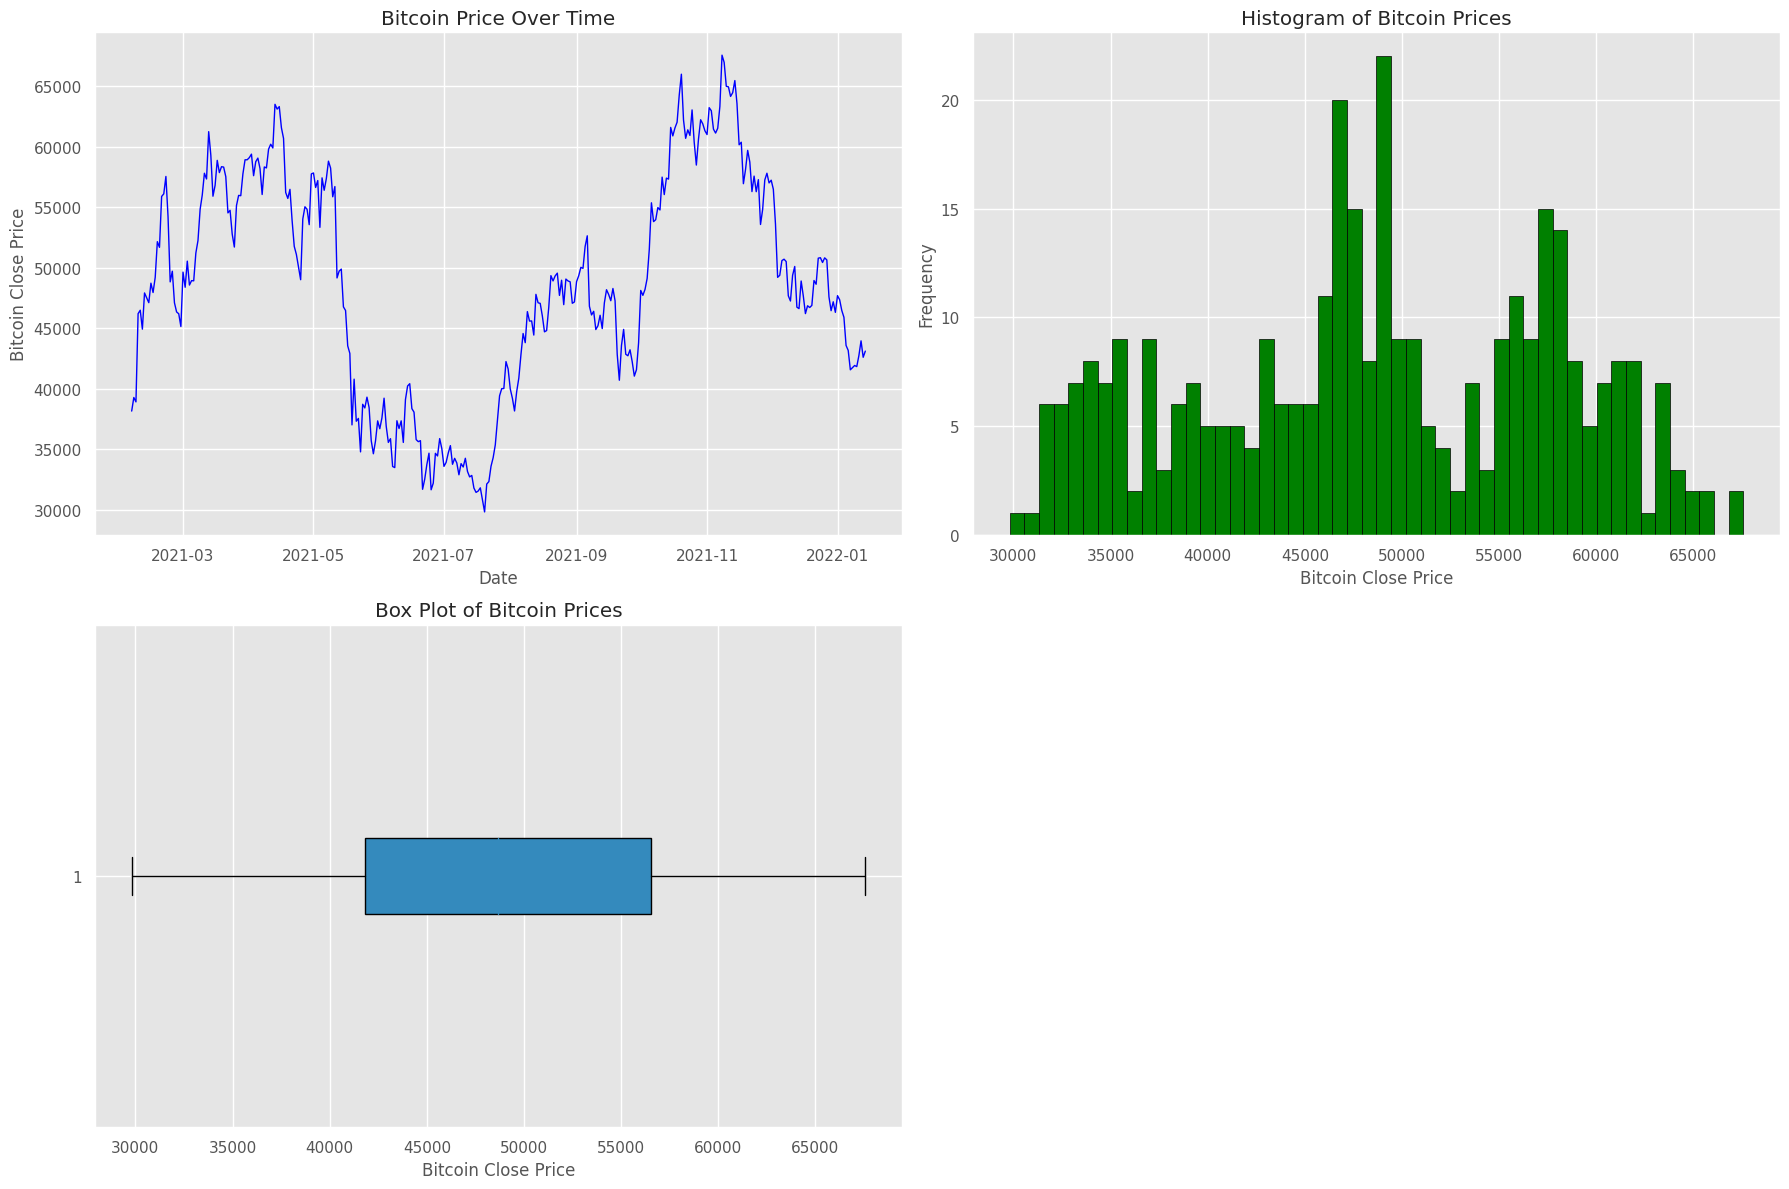

In [ ]:
plt.figure(figsize=(18, 12))

# Time Series plot of the Bitcoin price
plt.subplot(2, 2, 1)
plt.plot(bitcoin_price_df['Date'], bitcoin_price_df['Close'], color='blue', linewidth=1)
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.grid(True)

# Histogram of the Bitcoin price
plt.subplot(2, 2, 2)
plt.hist(bitcoin_price_df['Close'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Bitcoin Prices')
plt.xlabel('Bitcoin Close Price')
plt.ylabel('Frequency')

# Box Plot of the Bitcoin stock price
plt.subplot(2, 2, 3)
plt.boxplot(bitcoin_price_df['Close'], vert=False, patch_artist=True)
plt.title('Box Plot of Bitcoin Prices')
plt.xlabel('Bitcoin Close Price')

# Show the plots
plt.tight_layout()
plt.show()


Bitcoin Price Over Time:
- Trend: There's a clear upward and downward movement indicating volatility in the price of Bitcoin. For instance, a notable peak can be seen around mid-2021, and a sharp decline towards the end of 2021.
- Volatility: The price appears to have significant fluctuations within short periods, characteristic of the cryptocurrency markets.

Histogram of Bitcoin Prices:
- Common Price Points: There are peaks around certain price points, for example, around $45,000 and $55,000, indicating that Bitcoin often closed around these values.
- Distribution Shape: The distribution is not normal; it has multiple peaks, which indicates that the Bitcoin prices had several modes (most common values) in this period.

Box Plot of Bitcoin Prices:
- Range: The Bitcoin Prices are in the range $30,000 to $65,000.
- Outliers: There are no outliers in our data.

In [ ]:
# Calculate the daily returns for the Bitcoin
bitcoin_price_df['Return'] = bitcoin_price_df['Close'].pct_change() * 100

# We'll remove the first row since it will have a NaN value
bitcoin_price_df = bitcoin_price_df.iloc[1:]

# Preview the dataframe with daily returns
bitcoin_price_df.head()

,Date,Close,Return
1,2021-02-06,39266.011719,2.940683
2,2021-02-07,38903.441406,-0.923369
3,2021-02-08,46196.464844,18.746474
4,2021-02-09,46481.105469,0.616152
5,2021-02-10,44918.183594,-3.362489


In [ ]:
# Shift the bitcoin price data dates by one trading day to match with the tweets from the previous day
bitcoin_price_df['Shifted Date'] = bitcoin_price_df['Date'].shift(-1)

# Now merge the sentiment data with the shifted bitvoin price data on the adjusted dates
merged_data_btc = pd.merge(daily_sentiment_scores_btc, bitcoin_price_df, left_on='date', right_on='Shifted Date', how='left')

# We only need the 'Return' and the sentiment scores for our analysis, so we select those columns
merged_data_btc = merged_data_btc[['date', 'polarity', 'subjectivity', 'Return']]

# Drop rows with NaN values that result from the merge (these might be days when the stock market was closed)
merged_data_btc = merged_data_btc.dropna()

merged_data_btc.head()

,date,polarity,subjectivity,Return
22716,2021-02-14,0.100000,0.600000,-0.840621
42656,2021-03-12,0.000000,0.400000,3.207671
48518,2021-04-06,-0.018056,0.172222,0.509414
51946,2021-04-07,0.000000,0.400000,-1.465545
55651,2021-04-08,0.000000,0.400000,-3.683339


We will calculate the correlation coefficients for the following pairs of variables:

- Polarity and Daily Return
- Subjectivity and Daily Return

In [ ]:
# Calculate the correlation matrix for the merged dataset
sentiment_return_correlation_btc = merged_data_btc[['polarity', 'subjectivity', 'Return']].corr()

sentiment_return_correlation_btc

,polarity,subjectivity,Return
polarity,1.000000,0.304894,-0.267624
subjectivity,0.304894,1.000000,0.036759
Return,-0.267624,0.036759,1.000000


Polarity and Subjectivity:
- The correlation coefficient is approximately 0.304894. This suggests a low to moderate positive correlation. In practical terms, this means that as the polarity (sentiment) increases, there is a tendency for the subjectivity to increase as well, but the relationship is not very strong.

Polarity and Return:
- The correlation coefficient is approximately -0.267624. This indicates a low to moderate negative correlation. This could mean that as sentiment (polarity) becomes more positive, the investment return decreases slightly; or conversely, as sentiment becomes more negative, the return increases. However, the relationship is not strong and might not be statistically significant depending on the sample size and variance.

Subjectivity and Return:
- The correlation coefficient is approximately 0.036759. This value is very close to zero, suggesting that there is virtually no linear relationship between subjectivity and the financial return of the investment.

According to this correlation matrix, sentiment has a slight negative correlation with returns, while the level of subjectivity appears to have almost no relationship with returns. The polarity and subjectivity are somewhat positively correlated. It is essential to note that correlation does not imply causation, and these figures only describe the linear relationship between the variables.

Regression Analysis for Polarity

In [ ]:
import statsmodels.api as sm

# Define the independent variable 'polarity'
X_btc = sm.add_constant(merged_data_btc['polarity'])

# Define the dependent variable 'return'
y_btc = merged_data_btc['Return']

# Apply OLS regression model
regression_model_btc = sm.OLS(y_btc, X_btc).fit()

model_summary_btc = regression_model_btc.summary()
model_summary_btc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.397
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0404
Time:                        03:54:00   Log-Likelihood:                -154.43
No. Observations:                  59   AIC:                             312.9
Df Residuals:                      57   BIC:                             317.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9225      0.512      1.803      0.077      -0.102       1.947
polarity     -10.6584      5.083     -2.097      0.040     -20.836      -0.481
==============================================================================
Omnibus:                        5.778   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.795
Skew:                          -0.596   Prob(JB):                       0.0909
Kurtosis:                       3.726   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic and its p-value:
- A low p-value (typically ≤ 0.05) indicates that at least one of the coefficients in the model is significant—that is, not all of the regression coefficients are zero.

- For the polarity coefficient, the p-value is 0.040. Since this is less than the significance level of 0.05, we can reject the null hypothesis for the polarity coefficient, suggesting that there is a statistically significant relationship between polarity and returns.

- Based on the F-statistic and the p-value for the polarity coefficient, both suggest that the null hypothesis can be rejected, indicating that our model finds a significant relationship between polarity and returns.

- However, while the model may be statistically significant, it's important to consider the practical significance as well. The R-squared value of 0.072 indicates that only 7.2% of the variability in returns is explained by polarity. This means that 92.8% of the variability is due to other factors or inherent variability, which implies that while polarity does have a significant effect, there's a lot about the variation in returns that isn't captured by this model.

Regression Analysis for Subjectivity

In [ ]:
# Define the independent variable 'subjectivity'
X_subj_btc = sm.add_constant(merged_data_btc['subjectivity'])

# Apply OLS regression model
regression_model_subj_btc = sm.OLS(y_btc, X_subj_btc).fit()

model_summary_subj_btc = regression_model_subj_btc.summary()
model_summary_subj_btc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.07712
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.782
Time:                        03:54:00   Log-Likelihood:                -156.58
No. Observations:                  59   AIC:                             317.2
Df Residuals:                      57   BIC:                             321.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0027      1.421     -0.002      0.999      -2.849       2.844
subjectivity     1.1065      3.984      0.278      0.782      -6.872       9.085
==============================================================================
Omnibus:                        7.201   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.521
Skew:                          -0.641   Prob(JB):                       0.0384
Kurtosis:                       4.004   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic and its p-value:
- If the p-value is low (typically ≤ 0.05), it suggests that your model is statistically significant.

- The p-value for the 'subjectivity' coefficient is 0.782. This is much higher than 0.05, suggesting that there is no statistically significant relationship between subjectivity and returns.

- Based on the F-statistic and the p-value for the subjectivity coefficient, we would not reject the null hypothesis for either test. Both indicate that there is no evidence of a statistically significant relationship between subjectivity and Bitcoin returns.

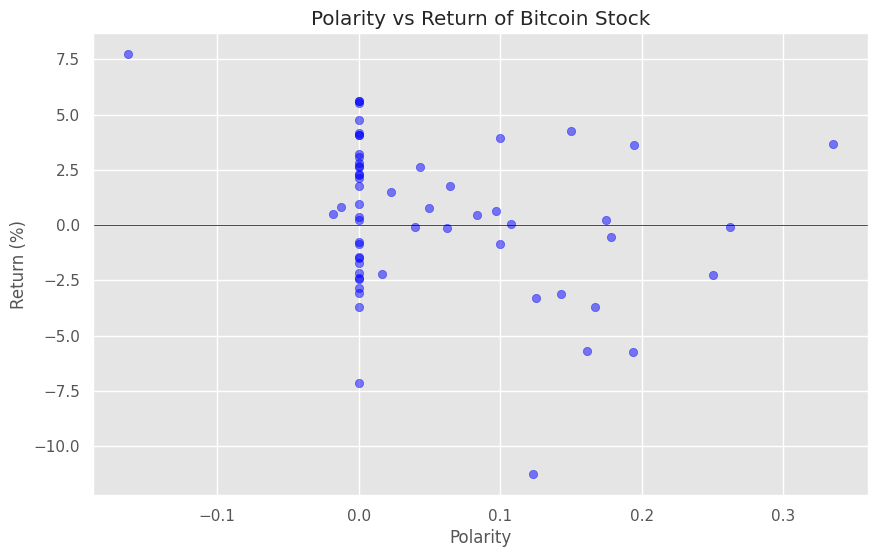

In [ ]:
# Plotting polarity vs return using matplotlib using ggplot
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data_btc['polarity'], merged_data_btc['Return'], alpha=0.5, color='blue')
plt.title('Polarity vs Return of Bitcoin Stock')
plt.xlabel('Polarity')
plt.ylabel('Return (%)')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()

This plot also does not show a clear pattern. The distribution of points suggests that there isn't a strong linear relationship between the sentiment polarity of the text and the returns on Bitcoin stock. There's a cluster of points around the neutrality area (polarity score of 0), but they are spread across a wide range of returns.

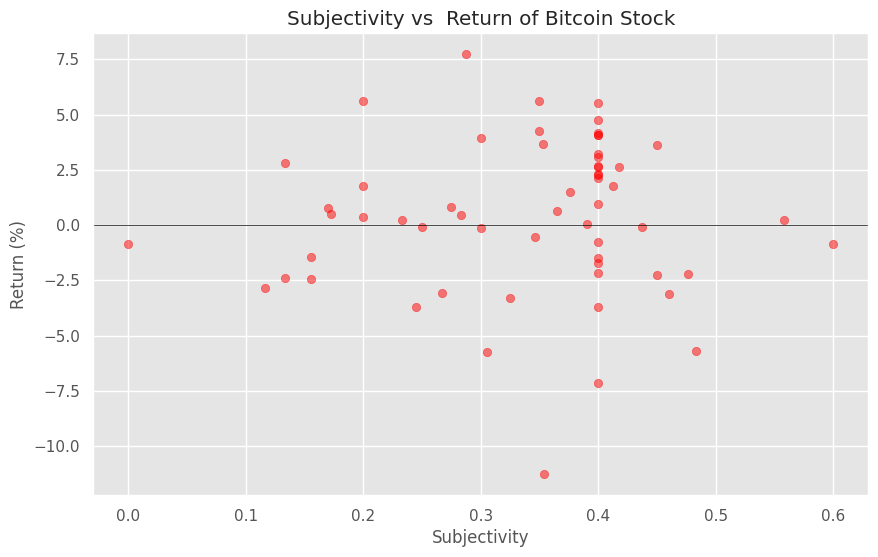

In [ ]:
# Plotting subjectivity vs  return using ggplot
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data_btc['subjectivity'], merged_data_btc['Return'], alpha=0.5, color='red')
plt.title('Subjectivity vs  Return of Bitcoin Stock')
plt.xlabel('Subjectivity')
plt.ylabel('Return (%)')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


From this plot, we can't discern a clear pattern or correlation between subjectivity and stock returns, suggesting that the degree of subjectivity in the related texts does not have a straightforward relationship with Bitcoin's investment returns.

Interpretation:
- Lack of Clear Correlation: Both plots indicate that there is no obvious linear relationship between the sentiment measures and the returns of Bitcoin stock. This could mean that the sentiment of the texts doesn't have a direct or simple impact on Bitcoin's market performance or that other variables might be influencing the returns.

- Spread of Data Points: The wide spread of data points, especially in the polarity plot, could suggest that the market's response to sentiment is complex and possibly influenced by many factors, not just the overall sentiment of the public discourse.

#**Two-Asset Portfolio Optimization:**

In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

#Define the stocks
stocks = ['TSLA', 'BTC-USD']

#Define the start and end dates
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 1, 1)

#Get the daily stock price data
tesla = yf.download('TSLA', start=start, end=end, interval="1d")['Close']
btc = yf.download('BTC-USD', start=start, end=end, interval="1d")['Close']

#Merging the two datasets with same dates
dspd = pd.merge(tesla, btc, on='Date', how='left')

#Defining the columns names
dspd.columns = ['TSLA', 'BTC_USD']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Displaying the merged dataframe
dspd.head()

,TSLA,BTC_USD
Date,,
2010-06-29,1.592667,NaN
2010-06-30,1.588667,NaN
2010-07-01,1.464000,NaN
2010-07-02,1.280000,NaN
2010-07-06,1.074000,NaN


In [ ]:
#Calculate daily returns
returns = np.log(dspd/dspd.shift(1))
returns.dropna(inplace=True)

#Summary statistics
returns.describe()

,TSLA,BTC_USD
count,2087.000000,2087.000000
mean,0.000937,0.001721
std,0.035416,0.045850
min,-0.236518,-0.464730
25%,-0.015457,-0.015853
50%,0.001012,0.001930
75%,0.018036,0.021361
max,0.181445,0.225119


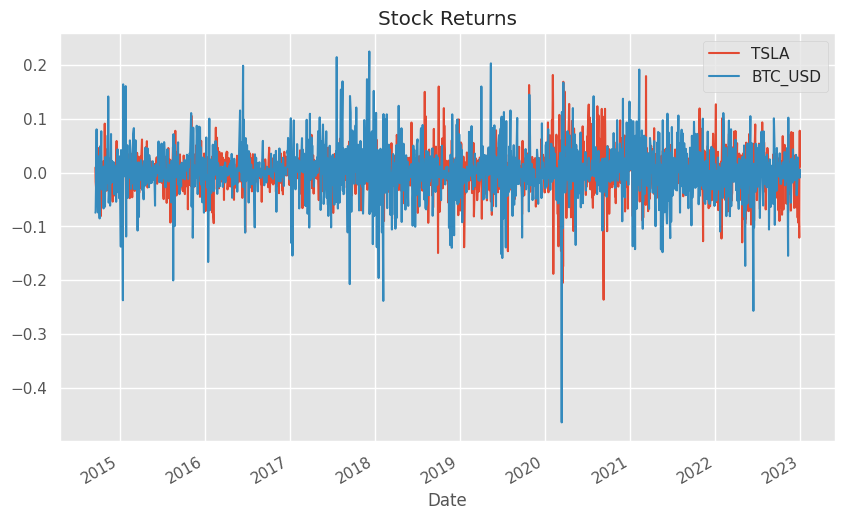

In [ ]:
#Plot the stock returns
returns.plot(figsize=(10, 6))
plt.title('Stock Returns')
plt.xlabel('Date')
plt.show()

Interpretation of Trends and Volatility:
- Volatility: Both assets show significant volatility, which is typical for stocks and cryptocurrencies. Volatility is evident from the large spikes and dips in the plotted lines.
- Comparative Performance: There are periods where one asset outperforms the other and vice versa. For instance, in certain periods, TSLA shows larger swings than BTC_USD, and sometimes the opposite is true.
- Trends: There are points where significant drops or spikes occur, which could correspond to market events, news, or changes in investor sentiment. These would require further analysis to understand their context.

In [ ]:
#Risk-free rate
rfr = 0.01

In [ ]:
#Function to get optimal weights
def get_opt(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * np.sqrt(252), weights)))
    sharpe = ret-rfr / vol
    return np.array([ret, vol, sharpe])

from scipy.optimize import minimize

def neg_sharpe(weights):
    return get_opt(weights)[2] * -1

def const_sum(weights):
    return np.sum(weights)-1

cons = ({'type':'eq', 'fun':const_sum})

bounds = ((0, 1), (0, 1))

#Our initial weights guess
init_guess = [0.50, 0.50]

result = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Extract the optimized portfolio weights
optimal_weights = result.x

In [ ]:
import pandas as pd
import yfinance as yf
from pypfopt import expected_returns, risk_models, EfficientFrontier
from pypfopt.cla import CLA
from pypfopt import plotting
import matplotlib.pyplot as plt

# Calculate daily returns
returns = dspd.pct_change().dropna()

# Calculate annualized returns and standard deviations
mu = expected_returns.mean_historical_return(dspd)
S = risk_models.sample_cov(dspd)

# Create an EfficientFrontier object
ef, ef1 = EfficientFrontier(mu, S), EfficientFrontier(mu, S)

custom_weights = {'TSLA': optimal_weights[0], 'BTC_USD':optimal_weights[1]}

weights = ef.max_sharpe(risk_free_rate=rfr)
ef.portfolio_performance(verbose=True)

# Calculate expected returns, volatility, and the Sharpe ratio for the optimized portfolio
expected_return = ef.portfolio_performance()[0]
volatility = ef.portfolio_performance()[1]
sharpe_ratio = ef.portfolio_performance(risk_free_rate=rfr)[2]

# Print the results
print("Optimal Portfolio Weights:")
print(weights)

Expected annual return: 47.4%
Annual volatility: 48.3%
Sharpe Ratio: 0.96
Optimal Portfolio Weights:
OrderedDict([('TSLA', 0.5460928063565135), ('BTC_USD', 0.4539071936434865)])


Expected Annual Return: 47.4%
- This indicates that, based on historical data and the chosen asset weights in the portfolio, the expected return on the portfolio is 47.4% per year. This is an optimistic expectation and would generally be considered very high compared to average market returns.

Annual Volatility: 48.3%
- An annual volatility of 48.3% is quite high and suggests that the value of the portfolio can fluctuate widely over the course of a year. This is not surprising given that both Tesla stocks and Bitcoin are known for their high volatility.

Sharpe Ratio: 0.96
- A Sharpe Ratio of 0.96 is relatively good, indicating that the investor is receiving just below a 1-to-1 return-to-volatility ratio. Typically, a Sharpe Ratio greater than 1 is considered excellent, around 0.5 is considered acceptable, and less than that is considered poor.

In [ ]:
print("Expected Portfolio Return:", expected_return)
print("Portfolio Volatility:", volatility)
print("Portfolio Sharpe Ratio:", sharpe_ratio)

Expected Portfolio Return: 0.47373837521813367
Portfolio Volatility: 0.48300916508518354
Portfolio Sharpe Ratio: 0.9601026413988412


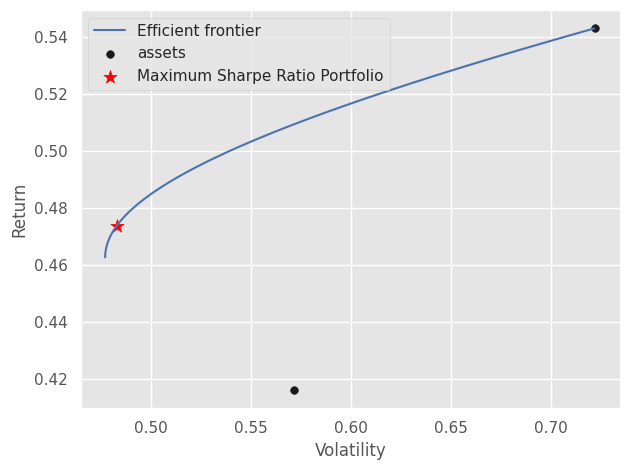

In [ ]:
# Plot the efficient frontier
plotting.plot_efficient_frontier(ef1, show_assets=True)

# Highlight the portfolio with the maximum Sharpe ratio
plt.scatter(volatility, expected_return, c='red', marker='*', s=100, label='Maximum Sharpe Ratio Portfolio')

# Show the plot
plt.legend()
plt.show()

Efficient Frontier:
- The curved line represents the efficient frontier, which is a set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie on the efficient frontier are considered to be optimally balanced in the context of risk vs. return.

Assets:
- The individual black dots represent the assets that have been analyzed. These dots indicate the risk and return profile of each asset. One of them do not lie on the efficient frontier, suggesting that it is not individually offering the optimal risk-reward balance compared to the portfolios on the efficient frontier.

Maximum Sharpe Ratio Portfolio:
- The red star represents the portfolio with the maximum Sharpe ratio, which is considered the optimal portfolio because it provides the best return per unit of risk. The fact that this star lies on the efficient frontier indicates that it is one of the optimal sets of portfolios.

### Final Thoughts on the Sentiment Analysis for Tesla and Bitcoin Tweets:
- Our sentiment analysis of Elon Musk's tweets about Tesla, as well as tweets containing #Bitcoin and #btc, suggests a small impact on Tesla's daily stock returns and Bitcoin valuations. Despite popular belief among some new investors that statements by influential figures like Musk can affect stock prices, our data indicates that sentiment from tweets is not a sole reliable predictor of stock market performance. It's worth noting that these findings are constrained by the limitations of our dataset and the analysis methods we used.

- It's crucial to understand that stock market movements are complex and influenced by many factors beyond sentiment. These include market conditions, economic indicators, and company performance. While sentiment analysis is a valuable tool, its predictive power for stock performance is limited.



Reference:
- Lecture notebooks